# THIS KERNAL IS BLEND OF So awesome kernels present Right now
# Vote if you love blend. 

## Kernels used comming from these awesome people:
### For the TF-IDF submissions they are comming from this kernel:
[NB-SVM strong linear baseline](https://www.kaggle.com/hamditarek/nb-svm-strong-linear-baseline)

[[TPU-Inference] Super Fast XLMRoberta](https://www.kaggle.com/shonenkov/tpu-inference-super-fast-xlmroberta)

[Jigsaw TPU: BERT with Huggingface and Keras](https://www.kaggle.com/miklgr500/jigsaw-tpu-bert-with-huggingface-and-keras)

[inference of bert tpu model ml w/ validation](https://www.kaggle.com/abhishek/inference-of-bert-tpu-model-ml-w-validation)

# phase 1 [Ensemble]

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [2]:
submission1 = pd.read_csv('/kaggle/input/009383/submission (17).csv')
submission2 = pd.read_csv('/kaggle/input/tfidf/submission (27).csv')
submission3 = pd.read_csv('../input/tpuinference-super-fast-xlmroberta/submission (47).csv')

# Hist Graph of scores

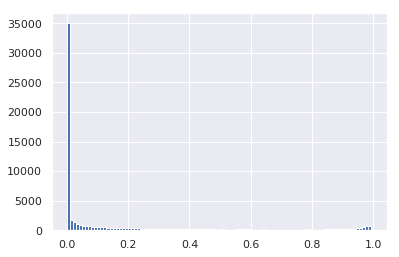

In [3]:
sns.set()
plt.hist(submission1['toxic'],bins=100)
plt.show()

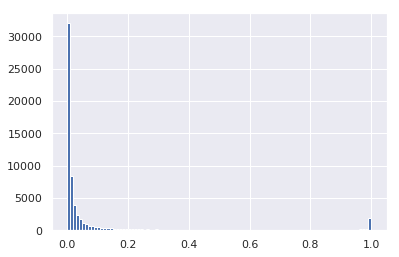

In [4]:
sns.set()
plt.hist(submission2['toxic'],bins=100)
plt.show()

In [5]:
submission1['toxic'] = submission1['toxic']*0.05 + submission2['toxic']*0.15 + submission3['toxic']*0.8

In [6]:
submission1.to_csv('submission.csv', index=False)

# phase 2 [Stacking]

In [7]:
sub_path = "../input/blending"
all_files = os.listdir(sub_path)
all_files

['submission (7).csv', 'submission (8).csv']

In [8]:
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "jigsaw" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

In [9]:
# check correlation
concat_sub.iloc[:,1:ncol].corr()

,jigsaw0,jigsaw1
jigsaw0,1.000000,0.852971
jigsaw1,0.852971,1.000000


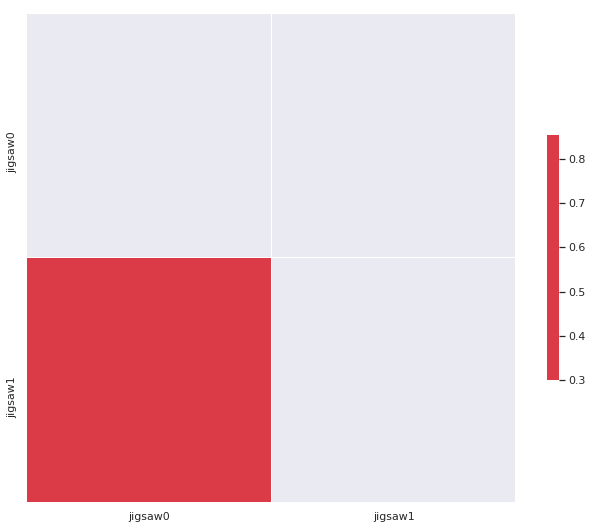

In [10]:
corr = concat_sub.iloc[:,1:7].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
# get the data fields ready for stacking
concat_sub['jigsaw_max'] = concat_sub.iloc[:, 1:ncol].max(axis=1)
concat_sub['jigsaw_min'] = concat_sub.iloc[:, 1:ncol].min(axis=1)
concat_sub['jigsaw_mean'] = concat_sub.iloc[:, 1:ncol].mean(axis=1)
concat_sub['jigsaw_median'] = concat_sub.iloc[:, 1:ncol].median(axis=1)

In [12]:
concat_sub.describe()

,id,jigsaw0,jigsaw1,jigsaw_max,jigsaw_min,jigsaw_mean,jigsaw_median
count,63812.000000,63812.000000,63812.000000,63812.000000,63812.000000,63812.000000,63812.000000
mean,31905.500000,0.145984,-3.751629,0.295563,-3.901208,-1.802823,-1.802823
std,18421.082026,0.218722,3.057071,0.774412,2.753732,1.622821,1.622821
min,0.000000,0.000659,-7.643625,0.000659,-7.643625,-3.820888,-3.820888
25%,15952.750000,0.007442,-6.543496,0.007442,-6.543496,-3.266742,-3.266742
50%,31905.500000,0.033775,-4.488123,0.033794,-4.488123,-2.221528,-2.221528
75%,47858.250000,0.199730,-1.379302,0.203554,-1.379302,-0.584269,-0.584269
max,63811.000000,0.996296,5.965222,5.965222,0.996296,3.478134,3.478134


In [13]:
cutoff_lo = 0.7
cutoff_hi = 0.3

In [14]:
concat_sub['toxic'] = concat_sub['jigsaw_mean']
concat_sub[['toxic']].to_csv('submission2.csv', 
                                        index=False, float_format='%.6f')

In [15]:
concat_sub['toxic'] = concat_sub['jigsaw_median']
concat_sub[['toxic']].to_csv('submission1.csv', 
                                        index=False, float_format='%.6f')

In [16]:
concat_sub['toxic'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 1, 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             0, concat_sub['jigsaw_median']))
concat_sub[['toxic']].to_csv('submission3.csv', 
                                        index=False, float_format='%.6f')

In [17]:
concat_sub['toxic'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 
                                    concat_sub['jigsaw_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             concat_sub['jigsaw_min'], 
                                             concat_sub['jigsaw_mean']))
concat_sub[['toxic']].to_csv('submission4.csv', 
                                        index=False, float_format='%.6f')

In [18]:
concat_sub['toxic'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 
                                    concat_sub['jigsaw_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             concat_sub['jigsaw_min'], 
                                             concat_sub['jigsaw_median']))
concat_sub[['toxic']].to_csv('submission5.csv', 
                                        index=False, float_format='%.6f')